Download 5 years of data from: https://www.nasdaq.com/market-activity/stocks/goog/historical

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math

from sklearn.preprocessing import MinMaxScaler

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, LSTM

from google.colab import drive

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
stock_data = pd.read_csv('historical_google.csv')

In [ ]:
stock_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/23/2021,$2756.32,1318887,$2705.2,$2776.17,$2694.01
1,07/22/2021,$2666.57,680407,$2653,$2670.09,$2648
2,07/21/2021,$2652.01,737082,$2615.74,$2652.345,$2612.03
3,07/20/2021,$2622.03,954156,$2600.08,$2640.0271,$2583.7675
4,07/19/2021,$2585.08,1285466,$2623.11,$2624.94,$2570.74


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1259 non-null   object
 1   Close/Last  1259 non-null   object
 2   Volume      1259 non-null   int64 
 3   Open        1259 non-null   object
 4   High        1259 non-null   object
 5   Low         1259 non-null   object
dtypes: int64(1), object(5)
memory usage: 59.1+ KB


In [ ]:
stock_data[stock_data.columns[1:2]] = stock_data[stock_data.columns[1:2]].replace('[\$,]', '', regex=True).astype(float)
stock_data[stock_data.columns[3:]] = stock_data[stock_data.columns[3:]].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
stock_data.head()

,Date,Close/Last,Volume,Open,High,Low
0,07/23/2021,2756.32,1318887,2705.20,2776.1700,2694.0100
1,07/22/2021,2666.57,680407,2653.00,2670.0900,2648.0000
2,07/21/2021,2652.01,737082,2615.74,2652.3450,2612.0300
3,07/20/2021,2622.03,954156,2600.08,2640.0271,2583.7675
4,07/19/2021,2585.08,1285466,2623.11,2624.9400,2570.7400


In [ ]:
stock_data["Average"] = (stock_data["High"] + stock_data["Low"])/2
stock_data.head()

,Date,Close/Last,Volume,Open,High,Low,Average
0,07/23/2021,2756.32,1318887,2705.20,2776.1700,2694.0100,2735.0900
1,07/22/2021,2666.57,680407,2653.00,2670.0900,2648.0000,2659.0450
2,07/21/2021,2652.01,737082,2615.74,2652.3450,2612.0300,2632.1875
3,07/20/2021,2622.03,954156,2600.08,2640.0271,2583.7675,2611.8973
4,07/19/2021,2585.08,1285466,2623.11,2624.9400,2570.7400,2597.8400


In [ ]:
input_data = stock_data.iloc[:,[2,6]].values

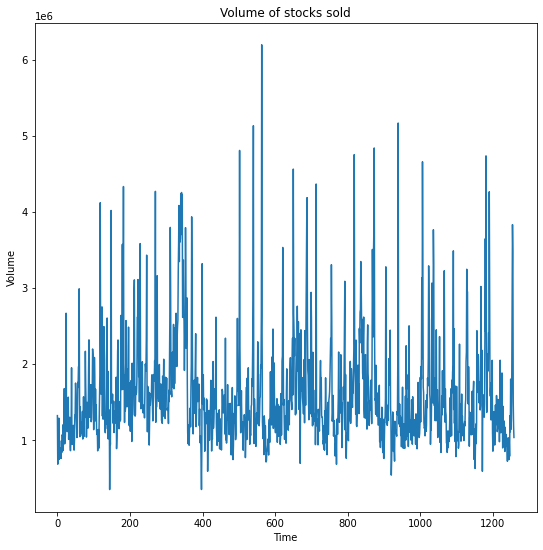

In [ ]:
plt.plot(input_data[:,0])
plt.title("Volume of stocks sold")
plt.xlabel("Time")
plt.ylabel("Volume")
plt.show()

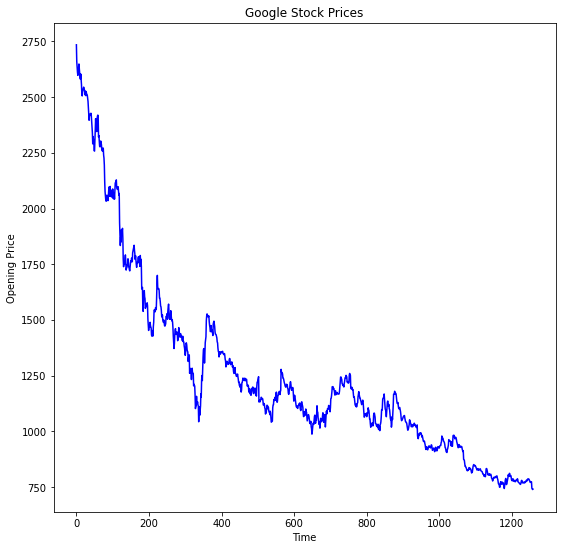

In [ ]:
plt.plot(input_data[:,1], color='blue')
plt.title("Google Stock Prices")
plt.xlabel("Time")
plt.ylabel("Opening Price")
plt.show()

In [ ]:
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_data[:,:])

In [ ]:
lookback= 50

test_size=int(.3 * len(stock_data))
X=[]
y=[]
for i in range(len(stock_data)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

In [ ]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(1208, 50, 2)
(427, 50, 2)


In [ ]:
model = Sequential()
model.add(LSTM(units=30, return_sequences= True, input_shape=(X.shape[1],2)))
model.add(LSTM(units=30, return_sequences=True))
model.add(LSTM(units=30))
model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 30)            3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 30)            7320      
_________________________________________________________________
lstm_2 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 18,631
Trainable params: 18,631
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X, y, epochs=200, batch_size=32)

Epoch 1/200
38/38 [==============================] - 25s 511ms/step - loss: 0.0143
Epoch 2/200
38/38 [==============================] - 18s 481ms/step - loss: 0.0011
Epoch 3/200
38/38 [==============================] - 18s 478ms/step - loss: 7.9813e-04
Epoch 4/200
38/38 [==============================] - 19s 499ms/step - loss: 7.1598e-04
Epoch 5/200
38/38 [==============================] - 19s 499ms/step - loss: 7.0815e-04
Epoch 6/200
38/38 [==============================] - 20s 517ms/step - loss: 6.8686e-04
Epoch 7/200
38/38 [==============================] - 18s 486ms/step - loss: 6.4068e-04
Epoch 8/200
38/38 [==============================] - 18s 480ms/step - loss: 6.0939e-04
Epoch 9/200
38/38 [==============================] - 19s 492ms/step - loss: 6.2633e-04
Epoch 10/200
38/38 [==============================] - 19s 503ms/step - loss: 6.8962e-04
Epoch 11/200
38/38 [==============================] - 18s 482ms/step - loss: 6.4700e-04
Epoch 12/200
38/38 [=============================

In [ ]:
predicted_value = model.predict(X_test)

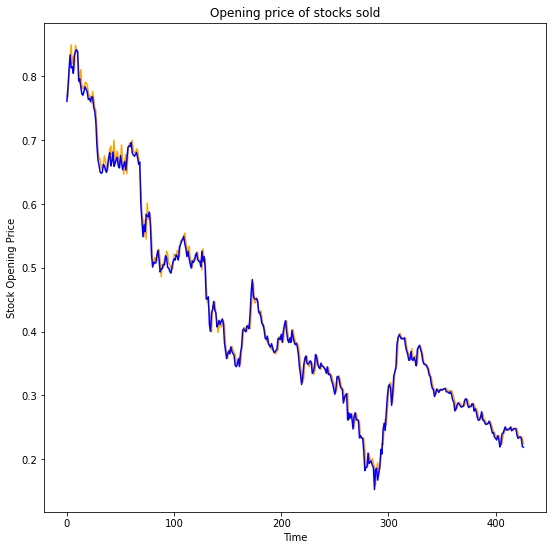

In [ ]:
plt.plot(predicted_value, color= 'orange')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='blue')
plt.title("Opening price of stocks sold")
plt.xlabel("Time")
plt.ylabel("Stock Opening Price")
plt.show()